In [1]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# tensorflow 1.x examples 실습

In [4]:
# [털, 날개], [hair, wing]
x_data = np.array([ [0,0], [1,0], [1,1], [0,0], [0,0], [0,1] ])
#  y                기타   포유류 조류   기타   기타   조류

In [5]:
# [기타, 포유류, 조류], [etc, mammalia, birds]
y_data = np.array([
    [1,0,0], [0,1,0], [0,0,1], [1,0,0], [1,0,0], [0,0,1]
])

In [6]:
X = tf.placeholder(tf.float32)

In [7]:
Y = tf.placeholder(tf.float32)

In [8]:
W1 = tf.Variable(tf.random_uniform([2, 10], -1., 1.)) # [특성_수, 뉴런_수]

In [9]:
W2 = tf.Variable(tf.random_uniform([10, 3], -1., 1.))  # [들어오는_수, 나가는_수]

In [10]:
b1 = tf.Variable(tf.zeros([10]))

In [11]:
b2 = tf.Variable(tf.zeros([3]))

In [12]:
L1 = tf.add(tf.matmul(X, W1), b1)  # X 행렬곱 W1 + b1

In [13]:
L1 = tf.nn.relu(L1)

In [14]:
model = tf.add(tf.matmul(L1, W2), b2)  # L1 행렬곱 W2 + b1

In [15]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=model))

In [16]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)

In [17]:
train_op = optimizer.minimize(cost)

In [18]:
sess = tf.Session()

In [19]:
sess.run( tf.global_variables_initializer() )

In [20]:
%%time
for step in range(1, 101):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step+1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

11 1.0374869
21 0.8272547
31 0.66698647
41 0.54022664
51 0.43990716
61 0.35970142
71 0.2940385
81 0.24030848
91 0.19388805
101 0.15210308
Wall time: 186 ms


In [21]:
prediction = tf.argmax(model, axis=1)

In [22]:
target = tf.argmax(Y, axis=1) # [1,0,0]

In [23]:
print("예측값:", sess.run(prediction, feed_dict={X: x_data}))
# 예측값: [0 1 2 0 0 2]

예측값: [0 1 2 0 0 2]


In [24]:
print("실제값:", sess.run(target, feed_dict={Y: y_data}))
# 실제값: [0 1 2 0 0 2]

실제값: [0 1 2 0 0 2]


In [25]:
is_correct = tf.equal(prediction, target)

In [26]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [27]:
print("정확도: {:.2f}%".format(sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data})))

정확도: 100.00%


In [28]:
sess.close()

In [29]:
# tensorflow 1.x mnist example 손글씨 숫자 DNN 실습

In [30]:
import tensorflow as tf

In [31]:
from tensorflow.examples.tutorials.mnist import input_data

In [32]:
mnist = input_data.read_data_sets('mnist/data', one_hot=True)

Extracting mnist/data\train-images-idx3-ubyte.gz
Extracting mnist/data\train-labels-idx1-ubyte.gz
Extracting mnist/data\t10k-images-idx3-ubyte.gz
Extracting mnist/data\t10k-labels-idx1-ubyte.gz


In [33]:
X = tf.placeholder(tf.float32, [None, 784])

In [34]:
Y = tf.placeholder(tf.float32, [None, 10])

In [35]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))

In [36]:
L1 = tf.nn.relu(tf.matmul(X, W1))

In [37]:
# 케라스 코드 참조
# model.add(Dense(256, activation='relu', input_shape=(784,)))

In [38]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))

In [39]:
L2 = tf.nn.relu(tf.matmul(L1, W2))

In [40]:
# model.add(Dense(256, activation='relu'))

In [41]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))

In [42]:
model = tf.matmul(L2, W3)

In [43]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))

In [44]:
# model.add(Dense(10, activation='softmax'))

In [45]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [46]:
# model.compile(loss='sparse_categorical_crossentropy',
#              optimizer='adam', metrics=['accuracy'])

In [47]:
sess = tf.Session()

In [48]:
sess.run( tf.global_variables_initializer() )

In [49]:
mnist.train.num_examples  # 55000

55000

In [50]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)  # 55000 / 100 ==> 550

In [51]:
total_batch  # 550

550

In [52]:
# model.fit(x_train, y_train, epochs=15, batch_size=100)

In [53]:
# tqdm example

In [54]:
from tqdm import trange
from time import sleep

for i in trange(100):
    sleep(0.01)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 85.50it/s]


In [55]:
%%time
from tqdm import trange

#for epoch in range(15):
for epoch in trange(15):
    total_cost = 0
    for i in range(total_batch):  # 550
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs, Y:batch_ys})
        total_cost += cost_val
    print('epoch: {:04d}, cost: {:.3f}'.format((epoch+1), (total_cost/total_batch)))
print("train finish!")

  7%|█████▌                                                                             | 1/15 [00:02<00:37,  2.65s/it]

epoch: 0001, cost: 0.415


 13%|███████████                                                                        | 2/15 [00:05<00:34,  2.63s/it]

epoch: 0002, cost: 0.156


 20%|████████████████▌                                                                  | 3/15 [00:07<00:31,  2.62s/it]

epoch: 0003, cost: 0.101


 27%|██████████████████████▏                                                            | 4/15 [00:10<00:28,  2.62s/it]

epoch: 0004, cost: 0.072


 33%|███████████████████████████▋                                                       | 5/15 [00:13<00:26,  2.60s/it]

epoch: 0005, cost: 0.053


 40%|█████████████████████████████████▏                                                 | 6/15 [00:15<00:23,  2.61s/it]

epoch: 0006, cost: 0.042


 47%|██████████████████████████████████████▋                                            | 7/15 [00:18<00:20,  2.60s/it]

epoch: 0007, cost: 0.033


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:20<00:18,  2.60s/it]

epoch: 0008, cost: 0.027


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:23<00:15,  2.60s/it]

epoch: 0009, cost: 0.022


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:26<00:13,  2.60s/it]

epoch: 0010, cost: 0.017


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:28<00:10,  2.59s/it]

epoch: 0011, cost: 0.016


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:31<00:07,  2.60s/it]

epoch: 0012, cost: 0.012


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:33<00:05,  2.60s/it]

epoch: 0013, cost: 0.013


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:36<00:02,  2.59s/it]

epoch: 0014, cost: 0.013


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:38<00:00,  2.60s/it]

epoch: 0015, cost: 0.007
train finish!
Wall time: 39 s


In [56]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))

In [57]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [58]:
print("test 정확도: {:.3f}".format(sess.run(accuracy, feed_dict={X:mnist.test.images,
                                                         Y:mnist.test.labels})))

test 정확도: 0.978


In [59]:
sess.close()

In [60]:
# tensorflow 1.x, mnist DNN , Dropout 적용

In [61]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [62]:
from tensorflow.examples.tutorials.mnist import input_data

In [63]:
mnist = input_data.read_data_sets('mnist/data', one_hot=True)

Extracting mnist/data\train-images-idx3-ubyte.gz
Extracting mnist/data\train-labels-idx1-ubyte.gz
Extracting mnist/data\t10k-images-idx3-ubyte.gz
Extracting mnist/data\t10k-labels-idx1-ubyte.gz


In [64]:
X = tf.placeholder(tf.float32, [None, 784])

In [65]:
Y = tf.placeholder(tf.float32, [None, 10])

In [66]:
keep_prob = tf.placeholder(tf.float32)

In [67]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))

In [68]:
L1 = tf.nn.relu(tf.matmul(X, W1))  # layer 1, 1층

In [69]:
L1 = tf.nn.dropout(L1, keep_prob)

In [70]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))

In [71]:
L2 = tf.nn.relu(tf.matmul(L1, W2))  # layer 2, 2층

In [72]:
L2 = tf.nn.dropout(L2, keep_prob)

In [73]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))

In [74]:
model = tf.matmul(L2, W3)  # layer 3, 3층 ==> model

In [75]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))

In [76]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [77]:
range(10)  # lazy evaluation

range(0, 10)

In [78]:
list(range(10))  # sess.run(xxx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [79]:
sess = tf.Session()

In [80]:
sess.run( tf.global_variables_initializer() )

In [81]:
batch_size = 100

In [82]:
total_batch = int( mnist.train.num_examples / batch_size )  # 55000 / 100 ==> 550

In [83]:
from tqdm import trange

In [84]:
%%time
for epoch in trange(30):
    total_cost = 0
    for i in range(total_batch):  # 550
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict={X:batch_xs, Y:batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    print("epoch: {:04d} Avg. cost: {:.3f}".format((epoch+1), (total_cost/total_batch)))
print("train finish!")

  3%|██▊                                                                                | 1/30 [00:03<01:33,  3.22s/it]

epoch: 0001 Avg. cost: 0.427


  7%|█████▌                                                                             | 2/30 [00:06<01:29,  3.20s/it]

epoch: 0002 Avg. cost: 0.162


 10%|████████▎                                                                          | 3/30 [00:09<01:26,  3.19s/it]

epoch: 0003 Avg. cost: 0.114


 13%|███████████                                                                        | 4/30 [00:12<01:22,  3.19s/it]

epoch: 0004 Avg. cost: 0.088


 17%|█████████████▊                                                                     | 5/30 [00:15<01:19,  3.18s/it]

epoch: 0005 Avg. cost: 0.073


 20%|████████████████▌                                                                  | 6/30 [00:19<01:16,  3.20s/it]

epoch: 0006 Avg. cost: 0.060


 23%|███████████████████▎                                                               | 7/30 [00:22<01:14,  3.23s/it]

epoch: 0007 Avg. cost: 0.053


 27%|██████████████████████▏                                                            | 8/30 [00:25<01:10,  3.20s/it]

epoch: 0008 Avg. cost: 0.046


 30%|████████████████████████▉                                                          | 9/30 [00:28<01:07,  3.19s/it]

epoch: 0009 Avg. cost: 0.040


 33%|███████████████████████████▎                                                      | 10/30 [00:31<01:03,  3.18s/it]

epoch: 0010 Avg. cost: 0.038


 37%|██████████████████████████████                                                    | 11/30 [00:35<01:00,  3.17s/it]

epoch: 0011 Avg. cost: 0.034


 40%|████████████████████████████████▊                                                 | 12/30 [00:38<00:56,  3.16s/it]

epoch: 0012 Avg. cost: 0.030


 43%|███████████████████████████████████▌                                              | 13/30 [00:41<00:53,  3.16s/it]

epoch: 0013 Avg. cost: 0.030


 47%|██████████████████████████████████████▎                                           | 14/30 [00:44<00:50,  3.17s/it]

epoch: 0014 Avg. cost: 0.026


 50%|█████████████████████████████████████████                                         | 15/30 [00:47<00:47,  3.17s/it]

epoch: 0015 Avg. cost: 0.025


 53%|███████████████████████████████████████████▋                                      | 16/30 [00:50<00:44,  3.16s/it]

epoch: 0016 Avg. cost: 0.024


 57%|██████████████████████████████████████████████▍                                   | 17/30 [00:53<00:41,  3.16s/it]

epoch: 0017 Avg. cost: 0.022


 60%|█████████████████████████████████████████████████▏                                | 18/30 [00:57<00:37,  3.16s/it]

epoch: 0018 Avg. cost: 0.024


 63%|███████████████████████████████████████████████████▉                              | 19/30 [01:00<00:34,  3.16s/it]

epoch: 0019 Avg. cost: 0.020


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [01:03<00:32,  3.24s/it]

epoch: 0020 Avg. cost: 0.020


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [01:06<00:28,  3.22s/it]

epoch: 0021 Avg. cost: 0.020


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [01:10<00:25,  3.21s/it]

epoch: 0022 Avg. cost: 0.018


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [01:13<00:22,  3.19s/it]

epoch: 0023 Avg. cost: 0.018


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [01:16<00:19,  3.18s/it]

epoch: 0024 Avg. cost: 0.016


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [01:19<00:15,  3.18s/it]

epoch: 0025 Avg. cost: 0.017


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [01:22<00:12,  3.17s/it]

epoch: 0026 Avg. cost: 0.019


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [01:25<00:09,  3.18s/it]

epoch: 0027 Avg. cost: 0.016


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [01:29<00:06,  3.19s/it]

epoch: 0028 Avg. cost: 0.015


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [01:32<00:03,  3.29s/it]

epoch: 0029 Avg. cost: 0.016


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:35<00:00,  3.20s/it]

epoch: 0030 Avg. cost: 0.015
train finish!
Wall time: 1min 35s


In [85]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))

In [86]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [87]:
print("test acc: {:.3f}".format(sess.run(accuracy,
                                         feed_dict={X:mnist.test.images,
                                                   Y:mnist.test.labels,
                                                   keep_prob:1})))
# test acc: 0.982

test acc: 0.983


In [88]:
labels = sess.run(model,
                 feed_dict={X:mnist.test.images,
                            Y:mnist.test.labels,
                            keep_prob:1})

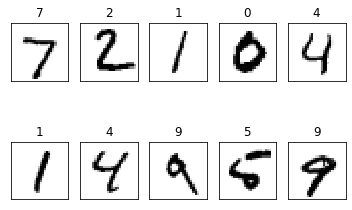

In [89]:
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    #subplot.set_title('{:d}'.format(np.argmax(labels[i])))
    subplot.set_title(f'{np.argmax(labels[i]):d}')
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
plt.show()

In [90]:
# tensorflow 1.x CNN

In [91]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [92]:
from tensorflow.examples.tutorials.mnist import input_data

In [93]:
mnist = input_data.read_data_sets("mnist/data", one_hot=True)

Extracting mnist/data\train-images-idx3-ubyte.gz
Extracting mnist/data\train-labels-idx1-ubyte.gz
Extracting mnist/data\t10k-images-idx3-ubyte.gz
Extracting mnist/data\t10k-labels-idx1-ubyte.gz


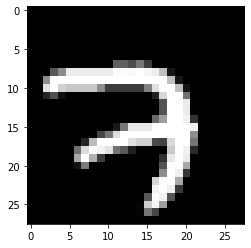

In [94]:
plt.imshow(mnist.train.images[0].reshape((28,28)), cmap=plt.cm.gray)

In [95]:
mnist.train.labels[0]
# array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
#        0   1   2   3   4   5   6   7   8   9

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [96]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1])  # [None, width, height, gray(흑백)]

In [97]:
Y = tf.placeholder(tf.float32, [None, 10])  # 10 = 0,1,2,3,4,5,6,7,8,9

In [98]:
keep_prob = tf.placeholder(tf.float32)

In [99]:
# 3 by 3 filter, 1 gray, 32 filters
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

In [100]:
from tensorflow import nn

In [101]:
L1 = nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME')

In [102]:
L1 = nn.relu(L1)

In [103]:
L1 = nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [104]:
L1 = nn.dropout(L1, keep_prob)

In [105]:
# model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

In [106]:
# 3 by 3 filter, before 32 filters, after 64 filters
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

In [107]:
L2 = nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')

In [108]:
L2 = nn.relu(L2)

In [109]:
L2 = nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') #7by7, 64filters

In [110]:
L2 = nn.dropout(L2, keep_prob)

In [111]:
# model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

In [112]:
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
# keras의 Flatten(), 7 * 7 * 64 (3 dimension) ==> 3136 (1 demension)

In [113]:
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])

In [114]:
L3 = tf.matmul(L3, W3)

In [115]:
L3 = nn.relu(L3)

In [116]:
L3 = nn.dropout(L3, keep_prob)

In [117]:
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))

In [118]:
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))

In [119]:
model = tf.matmul(L3, W4)

In [120]:
cost = tf.reduce_mean(nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))

In [121]:
# model.add(Dense(10, activation='softmax'))

In [122]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [123]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
#               metrics=['accuracy'])

In [124]:
sess = tf.Session()

In [125]:
sess.run( tf.global_variables_initializer() )

In [126]:
batch_size = 100

In [127]:
total_batch = int( mnist.train.num_examples / batch_size )  # 55000 / 100 ==> 550

In [128]:
a = 'hello'
b = 'python'
c = 'world'
print("{} {} {}".format(a, b, c))
print(f"{a} {b} {c}") 

hello python world
hello python world


In [129]:
a = 1
f"a : {a:04d}"

'a : 0001'

In [130]:
from tqdm import trange

In [131]:
%%time
for epoch in trange(15):
    total_cost = 0
    for i in range(total_batch): # 550
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict={X:batch_xs, Y:batch_ys, keep_prob:0.7})
        total_cost += cost_val
    print(f"epoch : {epoch:04d} avg. cost: {(total_cost/total_batch):.3f}")
print("train finish!!!")
# epoch : 0014 avg. cost: 0.028
# train finish!!!

  7%|█████▌                                                                             | 1/15 [01:09<16:15, 69.66s/it]

epoch : 0000 avg. cost: 0.407


 13%|███████████                                                                        | 2/15 [02:19<15:05, 69.69s/it]

epoch : 0001 avg. cost: 0.148


 20%|████████████████▌                                                                  | 3/15 [03:29<13:56, 69.70s/it]

epoch : 0002 avg. cost: 0.109


 27%|██████████████████████▏                                                            | 4/15 [04:38<12:46, 69.66s/it]

epoch : 0003 avg. cost: 0.088


 33%|███████████████████████████▋                                                       | 5/15 [05:48<11:37, 69.73s/it]

epoch : 0004 avg. cost: 0.071


 40%|█████████████████████████████████▏                                                 | 6/15 [06:58<10:27, 69.71s/it]

epoch : 0005 avg. cost: 0.063


 47%|██████████████████████████████████████▋                                            | 7/15 [08:07<09:16, 69.56s/it]

epoch : 0006 avg. cost: 0.056


 53%|████████████████████████████████████████████▎                                      | 8/15 [09:17<08:07, 69.59s/it]

epoch : 0007 avg. cost: 0.048


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [10:26<06:57, 69.61s/it]

epoch : 0008 avg. cost: 0.042


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [11:36<05:47, 69.59s/it]

epoch : 0009 avg. cost: 0.038


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [12:46<04:38, 69.63s/it]

epoch : 0010 avg. cost: 0.036


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [13:55<03:28, 69.55s/it]

epoch : 0011 avg. cost: 0.033


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [15:05<02:19, 69.71s/it]

epoch : 0012 avg. cost: 0.031


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [16:14<01:09, 69.56s/it]

epoch : 0013 avg. cost: 0.028


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [17:24<00:00, 69.63s/it]

epoch : 0014 avg. cost: 0.027
train finish!!!
Wall time: 17min 24s


In [132]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))

In [133]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [134]:
print("test acc: {:.3f}".format(
    sess.run(accuracy,
            feed_dict={X:mnist.test.images.reshape(-1,28,28,1),
                      Y:mnist.test.labels,
                      keep_prob: 1})))
# test acc: 0.992

test acc: 0.992


In [135]:
sess.close()

In [136]:
# tensorflow 1.x, autoencoder example

In [137]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [138]:
from tensorflow.examples.tutorials.mnist import input_data

In [139]:
mnist = input_data.read_data_sets('mnist/data', one_hot=True)

Extracting mnist/data\train-images-idx3-ubyte.gz
Extracting mnist/data\train-labels-idx1-ubyte.gz
Extracting mnist/data\t10k-images-idx3-ubyte.gz
Extracting mnist/data\t10k-labels-idx1-ubyte.gz


In [140]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [141]:
learning_rate = 0.01
train_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28 * 28

In [142]:
X = tf.placeholder(tf.float32, [None, n_input])

In [143]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))  # [784, 256]

In [144]:
b_encode = tf.Variable(tf.random_normal([n_hidden]))  # 256

In [145]:
from tensorflow import nn

In [146]:
encoder = nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode)) # XW + b

In [147]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input])) # [256, 784]

In [148]:
b_decode = tf.Variable(tf.random_normal([n_input])) # [784]

In [149]:
model = nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode)) # XW + b

In [150]:
cost = tf.reduce_mean(tf.pow(X - model, 2)) # mse

In [151]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [152]:
sess = tf.Session()

In [153]:
sess.run( tf.global_variables_initializer() )

In [154]:
total_batch = int( mnist.train.num_examples / batch_size ) # 55000 / 100 => 550

In [155]:
from tqdm import trange

In [156]:
%%time
for epoch in trange(train_epoch): # 20
    total_cost = 0
    for i in range(total_batch): # 550
        batch_xs, batch_ys = mnist.train.next_batch(batch_size) # 100
        _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs})
        total_cost += cost_val
    print(f"epoch: {(epoch+1):04d} avg. cost: {(total_cost/total_batch):.3f}")
print("train finish!!!")

# epoch: 0020 avg. cost: 0.028
# train finish!!!
# Wall time: 1min 26s

  5%|████▏                                                                              | 1/20 [00:04<01:22,  4.33s/it]

epoch: 0001 avg. cost: 0.198


 10%|████████▎                                                                          | 2/20 [00:08<01:17,  4.32s/it]

epoch: 0002 avg. cost: 0.061


 15%|████████████▍                                                                      | 3/20 [00:12<01:13,  4.32s/it]

epoch: 0003 avg. cost: 0.053


 20%|████████████████▌                                                                  | 4/20 [00:17<01:08,  4.30s/it]

epoch: 0004 avg. cost: 0.049


 25%|████████████████████▊                                                              | 5/20 [00:21<01:04,  4.31s/it]

epoch: 0005 avg. cost: 0.044


 30%|████████████████████████▉                                                          | 6/20 [00:25<01:00,  4.29s/it]

epoch: 0006 avg. cost: 0.042


 35%|█████████████████████████████                                                      | 7/20 [00:30<00:55,  4.29s/it]

epoch: 0007 avg. cost: 0.040


 40%|█████████████████████████████████▏                                                 | 8/20 [00:34<00:51,  4.29s/it]

epoch: 0008 avg. cost: 0.038


 45%|█████████████████████████████████████▎                                             | 9/20 [00:38<00:47,  4.28s/it]

epoch: 0009 avg. cost: 0.036


 50%|█████████████████████████████████████████                                         | 10/20 [00:42<00:42,  4.29s/it]

epoch: 0010 avg. cost: 0.035


 55%|█████████████████████████████████████████████                                     | 11/20 [00:47<00:38,  4.30s/it]

epoch: 0011 avg. cost: 0.033


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:51<00:34,  4.30s/it]

epoch: 0012 avg. cost: 0.032


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:55<00:30,  4.31s/it]

epoch: 0013 avg. cost: 0.032


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [01:00<00:25,  4.30s/it]

epoch: 0014 avg. cost: 0.032


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [01:04<00:21,  4.30s/it]

epoch: 0015 avg. cost: 0.030


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [01:08<00:17,  4.31s/it]

epoch: 0016 avg. cost: 0.030


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [01:13<00:13,  4.38s/it]

epoch: 0017 avg. cost: 0.029


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [01:17<00:08,  4.37s/it]

epoch: 0018 avg. cost: 0.029


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [01:21<00:04,  4.34s/it]

epoch: 0019 avg. cost: 0.029


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.31s/it]

epoch: 0020 avg. cost: 0.028
train finish!!!
Wall time: 1min 26s


In [157]:
sample_size = 10

In [158]:
samples = sess.run(model,
                  feed_dict={X:mnist.test.images[:sample_size]})

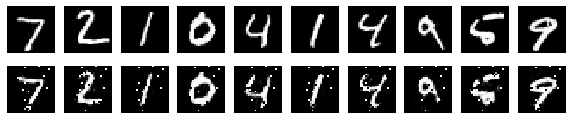

In [166]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))
for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)), cmap=plt.cm.gray)
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)), cmap=plt.cm.gray)
plt.show()

In [ ]:
# end